In [ ]:
from google.colab import files
import zipfile

# Upload file ZIP
uploaded = files.upload()

# Ekstrak file ZIP
with zipfile.ZipFile("student_dataset.zip", "r") as zip_ref:
    zip_ref.extractall("data")

Saving student_dataset.zip to student_dataset.zip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file utama
df = pd.read_csv("data/Students Performance Dataset.csv")
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [ ]:
df['Class'] = df['Total_Score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')

In [ ]:
X = df[[
    'Attendance (%)', 'Midterm_Score', 'Final_Score',
    'Assignments_Avg', 'Quizzes_Avg', 'Projects_Score',
    'Participation_Score', 'Study_Hours_per_Week',
    'Sleep_Hours_per_Night', 'Stress_Level (1-10)'
]]

y = df['Class']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)  # Fail = 0, Pass = 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Fail (0)', 'Pass (1)']))


--- Logistic Regression ---
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.9989
F1-score: 0.9995


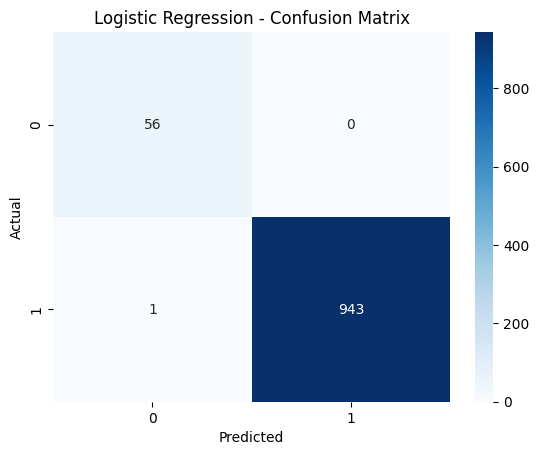


Classification Report:
              precision    recall  f1-score   support

    Fail (0)       0.98      1.00      0.99        56
    Pass (1)       1.00      1.00      1.00       944

    accuracy                           1.00      1000
   macro avg       0.99      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


--- Random Forest ---
Accuracy: 0.9690
Precision: 0.9692
Recall: 0.9989
F1-score: 0.9838


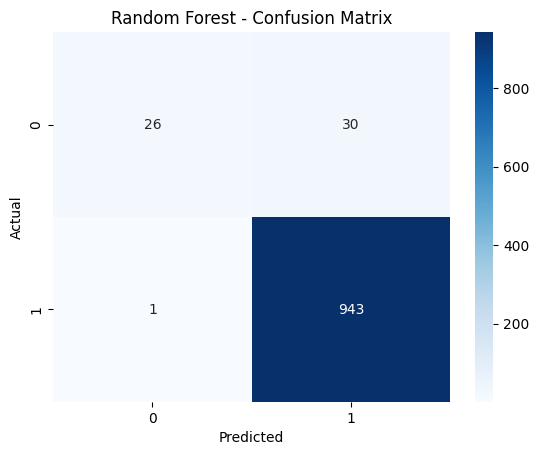


Classification Report:
              precision    recall  f1-score   support

    Fail (0)       0.96      0.46      0.63        56
    Pass (1)       0.97      1.00      0.98       944

    accuracy                           0.97      1000
   macro avg       0.97      0.73      0.81      1000
weighted avg       0.97      0.97      0.96      1000



In [ ]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

In [ ]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy (Random Forest): {cv_scores.mean():.4f}")


Cross-Validation Accuracy (Random Forest): 0.9670


In [ ]:
errors = (y_test != y_pred_rf)
error_df = X_test[errors]
error_df['True_Label'] = le.inverse_transform(y_test[errors])
error_df['Predicted_Label'] = le.inverse_transform(y_pred_rf[errors])

print("\nContoh Kesalahan Prediksi:")
print(error_df[['True_Label', 'Predicted_Label']])


Contoh Kesalahan Prediksi:
     True_Label Predicted_Label
4435       Fail            Pass
4259       Fail            Pass
4996       Fail            Pass
4068       Pass            Fail
4505       Fail            Pass
860        Fail            Pass
4499       Fail            Pass
4583       Fail            Pass
2397       Fail            Pass
1632       Fail            Pass
4787       Fail            Pass
4877       Fail            Pass
4084       Fail            Pass
1185       Fail            Pass
194        Fail            Pass
3545       Fail            Pass
1302       Fail            Pass
1130       Fail            Pass
130        Fail            Pass
3991       Fail            Pass
3298       Fail            Pass
4616       Fail            Pass
929        Fail            Pass
1046       Fail            Pass
1996       Fail            Pass
197        Fail            Pass
264        Fail            Pass
2431       Fail            Pass
2402       Fail            Pass
2078       F

In [ ]:
import joblib
joblib.dump(rf_model, 'student_pass_fail_model.pkl')

['student_pass_fail_model.pkl']